IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/ADMIN/Desktop/mushroom_cleaned.csv')

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [5]:
df.shape

(54035, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


MISSING VALUES

In [8]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

VISUALIZE THE DISTRIBUTION OF INDEPENDENT FEATURES

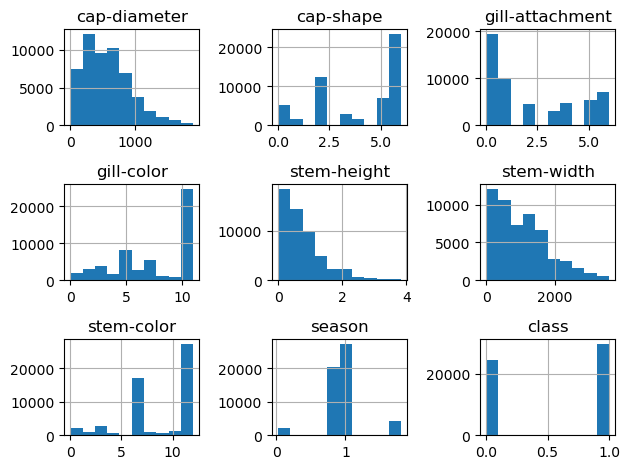

In [9]:
df.hist()
plt.tight_layout()

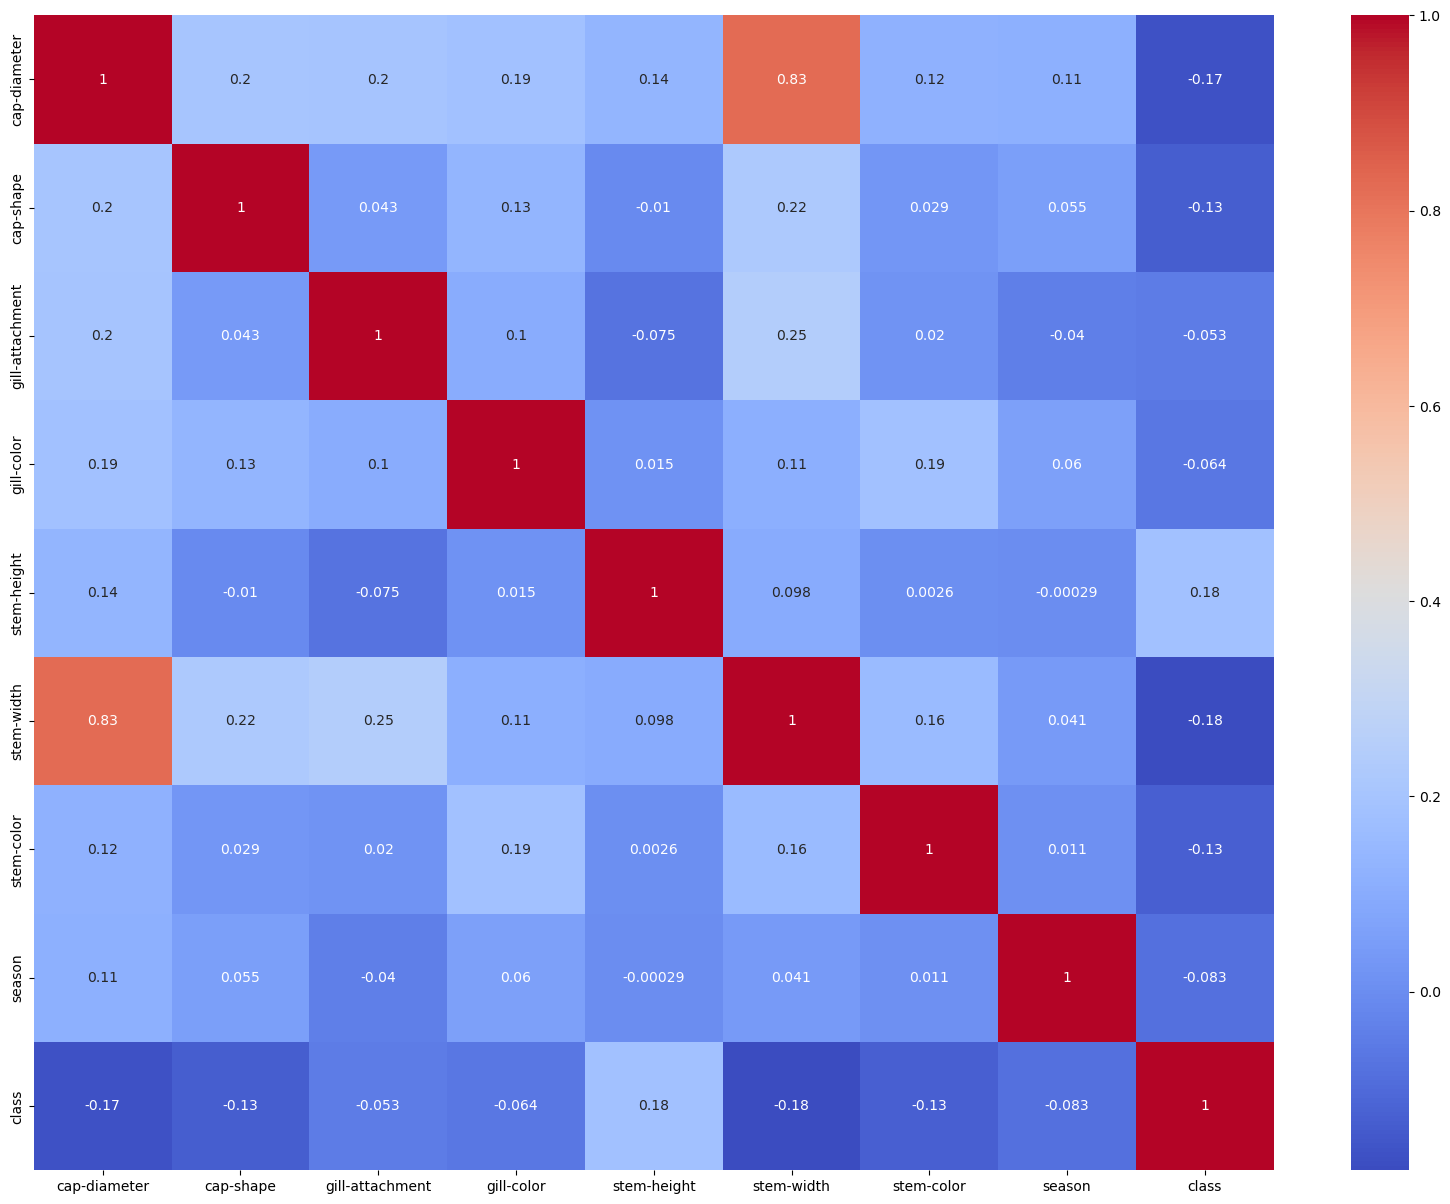

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [11]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

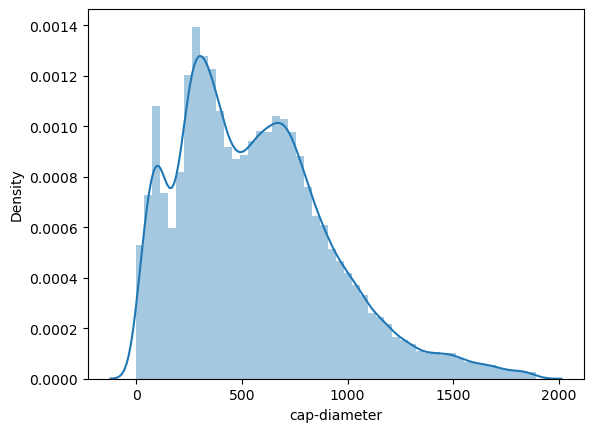

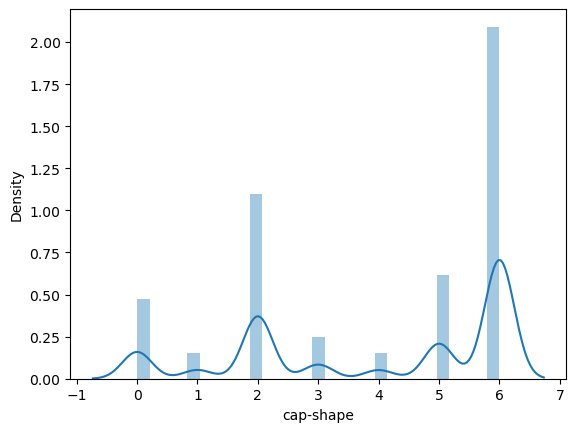

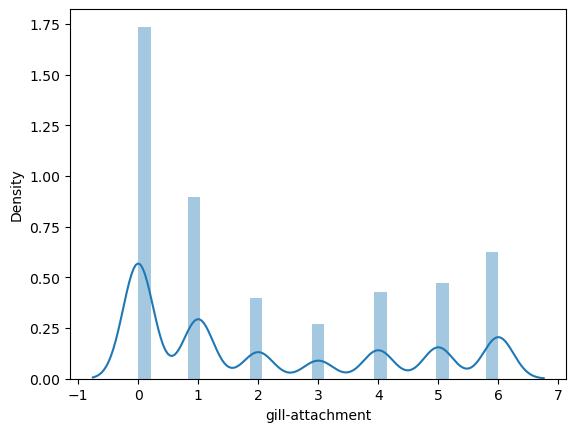

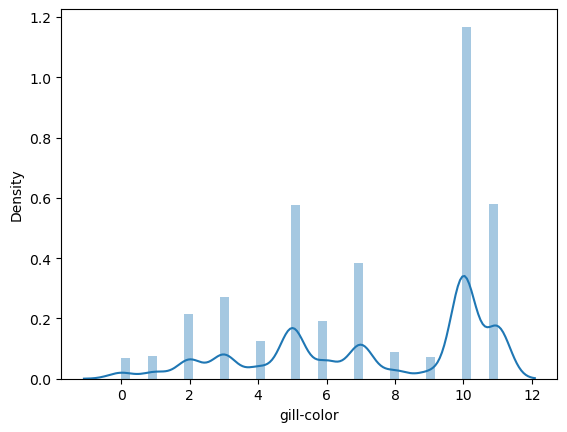

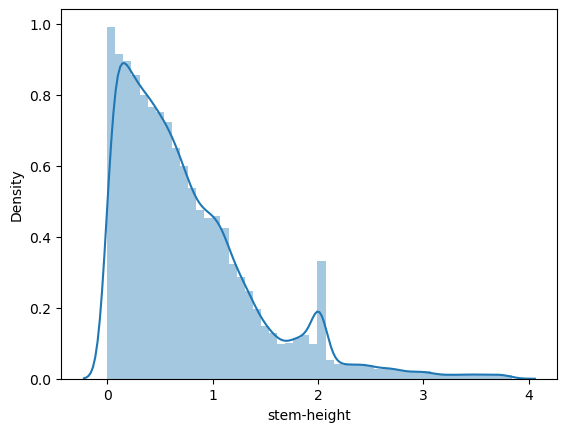

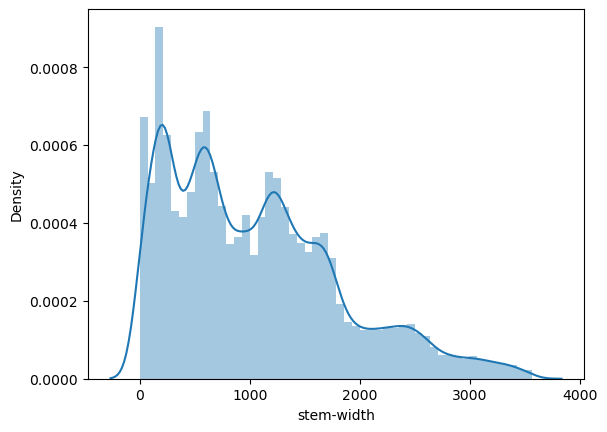

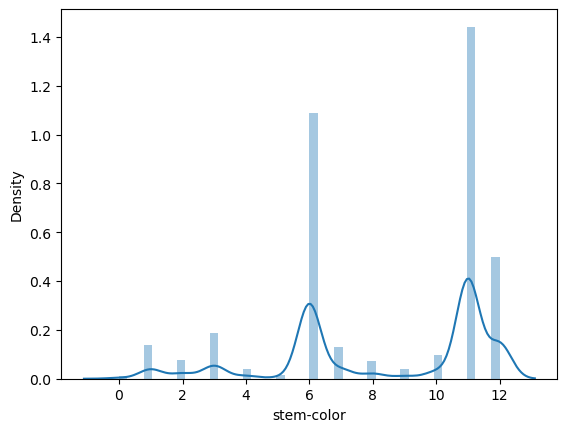

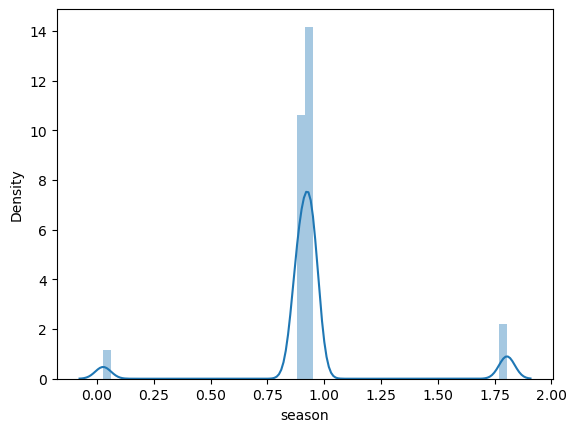

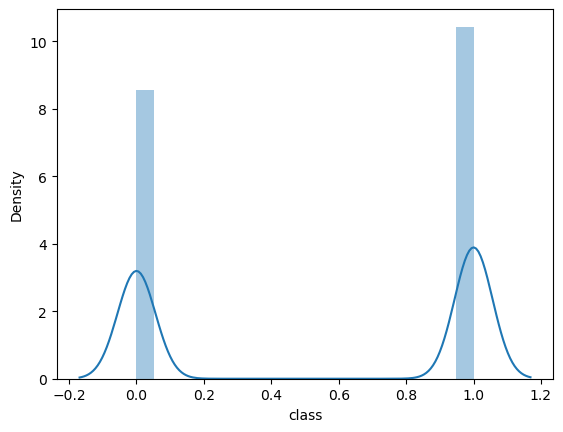

In [12]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

SPLIT THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLE

In [13]:
x=df.drop(['class'],axis=1)
y=df['class']

FEATURE SCALING

In [14]:
from sklearn.preprocessing import StandardScaler
scala=StandardScaler()
x=scala.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression()

EVALUATION OF MATRIX

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
yhat_train_lreg=lreg.predict(x_train)
yhat_test_lreg=lreg.predict(x_test)

In [19]:
print(classification_report(y_train,yhat_train_lreg))
print()
print(classification_report(y_test,yhat_test_lreg))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57     19552
           1       0.65      0.71      0.68     23676

    accuracy                           0.63     43228
   macro avg       0.63      0.63      0.63     43228
weighted avg       0.63      0.63      0.63     43228


              precision    recall  f1-score   support

           0       0.61      0.55      0.57      4808
           1       0.66      0.72      0.69      5999

    accuracy                           0.64     10807
   macro avg       0.64      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807



In [20]:
print(confusion_matrix(y_train,yhat_train_lreg))
print()
print(confusion_matrix(y_test,yhat_test_lreg))

[[10595  8957]
 [ 6902 16774]]

[[2624 2184]
 [1697 4302]]


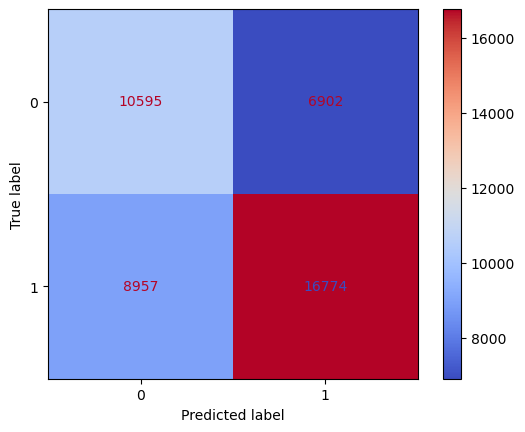

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_lreg,y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

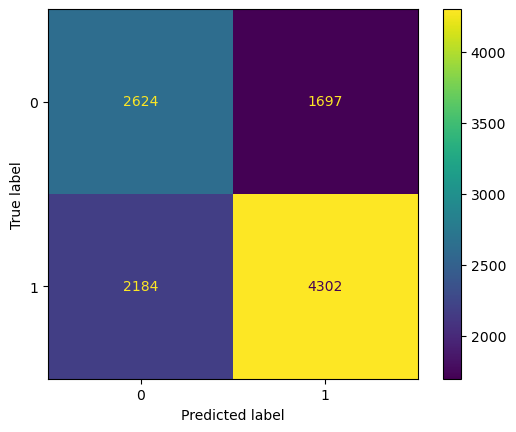

In [22]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_lreg,y_test))
c_matrix.plot(cmap=plt.cm.viridis)

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_train,yhat_train_lreg))
print()
print('Accuracy: ', accuracy_score(y_test,yhat_test_lreg))

Accuracy:  0.633131303784584

Accuracy:  0.6408809105209586


RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
yhat2_train_rfc=rfc.predict(x_train)
yhat2_test_rfc=rfc.predict(x_test)

In [26]:
print(classification_report(y_train,yhat2_train_rfc))
print()
print(classification_report(y_test,yhat2_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19552
           1       1.00      1.00      1.00     23676

    accuracy                           1.00     43228
   macro avg       1.00      1.00      1.00     43228
weighted avg       1.00      1.00      1.00     43228


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4808
           1       0.99      0.99      0.99      5999

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [27]:
print(confusion_matrix(y_train,yhat2_train_rfc))
print()
print(confusion_matrix(y_test,yhat2_test_rfc))

[[19552     0]
 [    0 23676]]

[[4754   54]
 [  62 5937]]


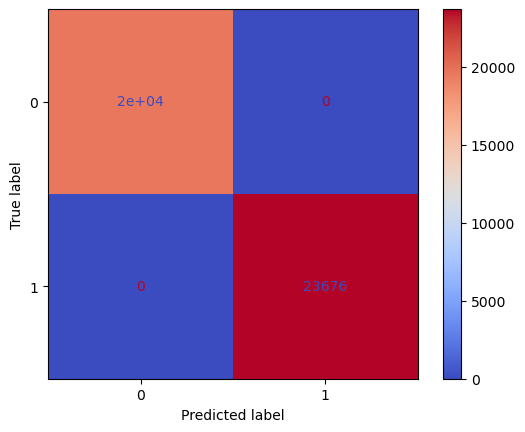

In [28]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat2_train_rfc,y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

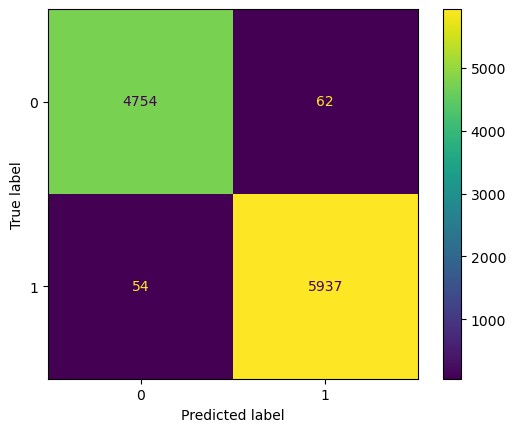

In [29]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat2_test_rfc,y_test))
c_matrix.plot(cmap=plt.cm.viridis)

In [30]:
print('Accuracy: ',accuracy_score(y_train,yhat2_train_rfc))
print()
print('Accuracy: ', accuracy_score(y_test,yhat2_test_rfc))

Accuracy:  1.0

Accuracy:  0.9892662163412603


ADA BOOST

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [32]:
yhat3_train_ada=ada.predict(x_train)
yhat3_test_ada=ada.predict(x_test)

In [33]:
print(classification_report(y_train,yhat3_train_ada))
print()
print(classification_report(y_test,yhat3_test_ada))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     19552
           1       0.77      0.80      0.78     23676

    accuracy                           0.76     43228
   macro avg       0.76      0.76      0.76     43228
weighted avg       0.76      0.76      0.76     43228


              precision    recall  f1-score   support

           0       0.74      0.69      0.71      4808
           1       0.77      0.80      0.78      5999

    accuracy                           0.75     10807
   macro avg       0.75      0.75      0.75     10807
weighted avg       0.75      0.75      0.75     10807



In [34]:
print(confusion_matrix(y_train,yhat3_train_ada))
print()
print(confusion_matrix(y_test,yhat3_test_ada))

[[13942  5610]
 [ 4788 18888]]

[[3334 1474]
 [1197 4802]]


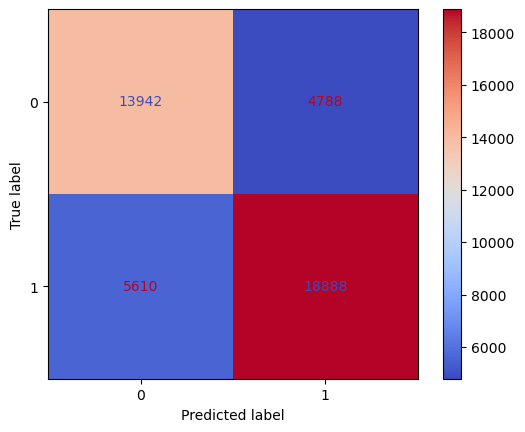

In [35]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat3_train_ada,y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

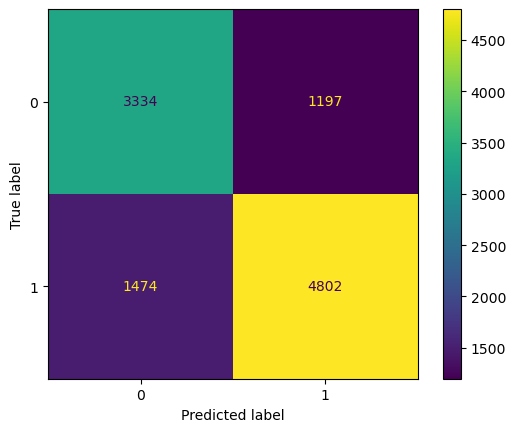

In [36]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat3_test_ada,y_test))
c_matrix.plot(cmap=plt.cm.viridis)

In [37]:
print('Accuracy: ',accuracy_score(y_train,yhat3_train_ada))
print()
print('Accuracy: ', accuracy_score(y_test,yhat3_test_ada))

Accuracy:  0.7594614601647081

Accuracy:  0.7528453779957435


XGB MODEL

In [38]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
yhat4_train_xgb=xgb.predict(x_train)
yhat4_test_xgb=xgb.predict(x_test)

In [40]:
print(classification_report(y_train,yhat4_train_xgb))
print()
print(classification_report(y_test,yhat4_test_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19552
           1       0.99      0.99      0.99     23676

    accuracy                           0.99     43228
   macro avg       0.99      0.99      0.99     43228
weighted avg       0.99      0.99      0.99     43228


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4808
           1       0.99      0.99      0.99      5999

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [41]:
print(confusion_matrix(y_train,yhat4_train_xgb))
print()
print(confusion_matrix(y_test,yhat4_test_xgb))

[[19424   128]
 [  172 23504]]

[[4744   64]
 [  70 5929]]


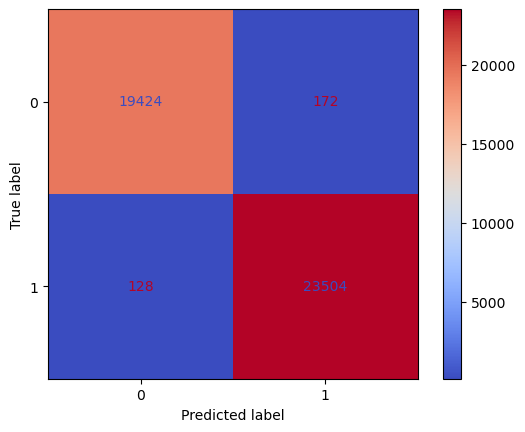

In [42]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat4_train_xgb,y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

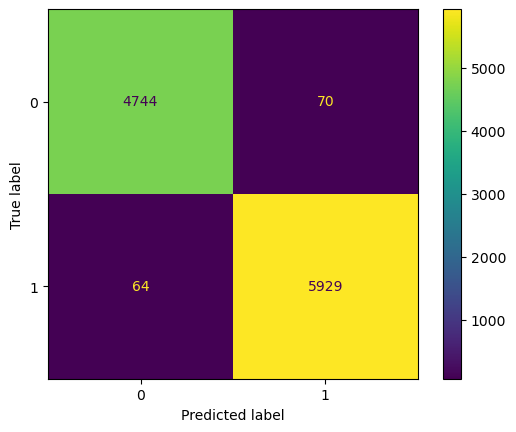

In [43]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat4_test_xgb,y_test))
c_matrix.plot(cmap=plt.cm.viridis)

In [44]:
print('Accuracy: ',accuracy_score(y_train,yhat4_train_xgb))
print()
print('Accuracy: ', accuracy_score(y_test,yhat4_test_xgb))

Accuracy:  0.9930600536689183

Accuracy:  0.9876006292218007


CONCLUSION

THE BEST PERFORMING MODELS OUT OF THE FOUR WERE:
    
    I)RANDOM FOREST        - 98.94%
    
    II)XGBOOST CLASSIFIER  - 98.76%
    
    III)ADA BOOST          - 75.28%
    
    IV)LOGISTIC REGRESSION - 64.08%